In [49]:
import numpy as np

In [50]:
#we will generate 40 3-dimensional samples randomly drawn from a multivariate Gaussian distribution. 
#Here, we will assume that the samples stem from two different classes, 
#where one half (i.e., 20) samples of our data set are labeled ω1 (class 1) and the other half ω2 (class 2).
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


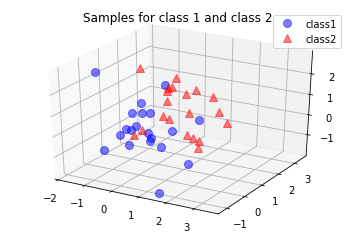

In [51]:
#Just to get a rough idea how the samples of our two classes ω1 and ω2 are distributed, let us plot them in a 3D scatter plot
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [52]:
#1. Taking the whole dataset ignoring the class labels
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [53]:
#2. Computing the d-dimensional mean vector
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.58688503]
 [0.45308532]
 [0.58022357]]


In [54]:
#3. a) Computing the Scatter Matrix
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[41.20671059 -6.35274996  1.0051787 ]
 [-6.35274996 36.63862497  2.59084362]
 [ 1.0051787   2.59084362 48.17713638]]


In [55]:
#3. b) Computing the Covariance Matrix (alternatively to the scatter matrix)
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.05658232 -0.16289102  0.02577381]
 [-0.16289102  0.93945192  0.06643189]
 [ 0.02577381  0.06643189  1.23531119]]


In [56]:
#4. Computing eigenvectors and corresponding eigenvalues

# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.56120001]
 [-0.81164382]
 [ 0.16213838]]
Eigenvalue 1 from scatter matrix: 31.728541973491076
Eigenvalue 1 from covariance matrix: 0.8135523582946429
Scaling factor:  39.00000000000001
----------------------------------------
Eigenvector 2: 
[[-0.82374858]
 [ 0.52864137]
 [-0.20488186]]
Eigenvalue 2 from scatter matrix: 45.533600326627926
Eigenvalue 2 from covariance matrix: 1.167528213503281
Scaling factor:  38.99999999999997
----------------------------------------
Eigenvector 3: 
[[-0.08057804]
 [ 0.24854097]
 [ 0.96526399]]
Eigenvalue 3 from scatter matrix: 48.76032963496455
Eigenvalue 3 from covariance matrix: 1.2502648624349886
Scaling factor:  38.99999999999999
----------------------------------------


In [57]:
#Checking the eigenvector-eigenvalue calculation
#Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation
#Σv=λv where Σ=Covariance matrix; v=Eigen vector; λ=Eigen value
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


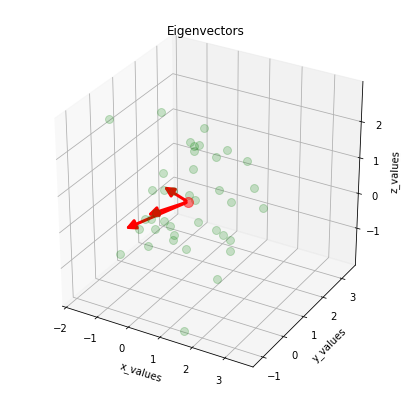

In [58]:
#Just to satisfy our own curiosity, we plot the eigenvectors centered at the sample mean.

%pylab inline
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [59]:
#the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, the following code:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
     # instead of 'assert' because of rounding errors

In [60]:
# 5.1. Sorting the eigenvectors by decreasing eigenvalues
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

48.76032963496455
45.533600326627926
31.728541973491076


In [61]:
# 5.2. Choosing k eigenvectors with the largest eigenvalues
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.08057804 -0.82374858]
 [ 0.24854097  0.52864137]
 [ 0.96526399 -0.20488186]]


In [62]:
# 6. Transforming the samples onto the new subspace
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

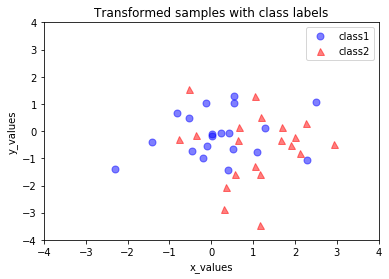

In [63]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Using the PCA() class from the matplotlib.mlab library
    Class attributes of PCA()

    a : a centered unit sigma version of input a

    numrows, numcols: the dimensions of a

    mu : a numdims array of means of a

    sigma : a numdims array of atandard deviation of a

    fracs : the proportion of variance of each of the principal components

    Wt : the weight vector for projecting a numdims point or array into PCA space

    Y : a projected into PCA space

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[-0.67422621  0.71805416  0.17267673]
 [ 0.34346533  0.09788191  0.93405069]
 [-0.65379705 -0.68906992  0.31262126]]


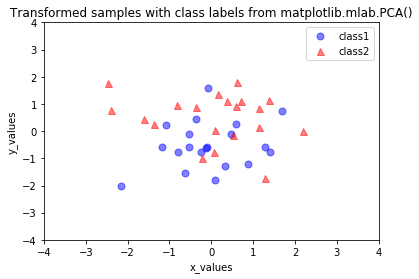

In [66]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

# Differences between the step by step approach and matplotlib.mlab.PCA()
When we plot the transformed dataset onto the new 2-dimensional subspace, we observe that the scatter plots from our step by step approach and the matplotlib.mlab.PCA() class do not look identical. This is due to the fact that matplotlib.mlab.PCA() class scales the variables to unit variance prior to calculating the covariance matrices. This will/could eventually lead to different variances along the axes and affect the contribution of the variable to principal components.

One example where a scaling would make sense would be if one variable was measured in the unit inches where the other variable was measured in cm.
However, for our hypothetical example, we assume that both variables have the same (arbitrary) unit, so that we skipped the step of scaling the input data.

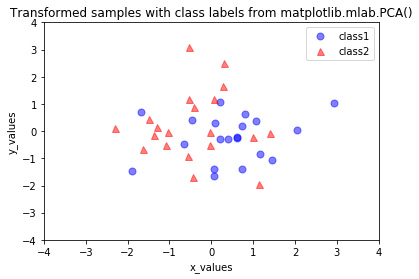

In [64]:
#Using the PCA() class from the sklearn.decomposition library to confirm our results
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

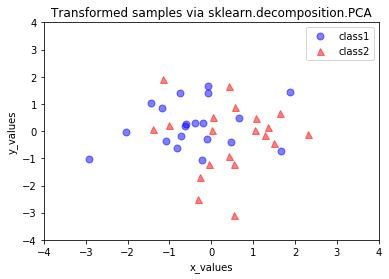

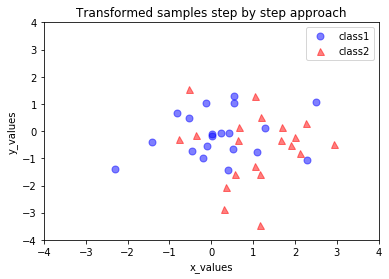

In [65]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()